In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
N_TILE = int(16800 / 6)
N_X = N_TILE
N_Y = N_TILE

In [75]:
import struct
from collections import defaultdict

NWORD = 273

def read_tile(fname: str):
    ms = []
    ns = []
    vem = np.zeros((2800, 2800), dtype=int)
    min_t = 66000 * np.ones((2800, 2800), dtype=int)
    t_all = []
    with open(fname, 'rb') as f:
        header = f.read(NWORD * 4)  # NWORD floats (each 4 bytes)
        header = struct.unpack("f" * NWORD, header)
        print(f"zenith angle = {header[10]}")
        while True:
            block = f.read(6 * 2)
            if not block:
                break
            block = struct.unpack("HHHHHH", block)
            m = block[0]
            n = block[1]
            vem[m, n] += block[3]
            ms.append(m)
            ns.append(n)
            t = block[4]
            t_all.append(t)
            if min_t[m, n] > t:
                min_t[m, n] = t
    return np.array(ms), np.array(ns), vem, min_t, np.array(t_all)


In [76]:
m_old, n_old, vem_old, min_t_old, t_all_old = read_tile("c2g_gea.dat")
m_new, n_new, vem_new, min_t_new, t_all_new = read_tile("c2g_p_gea.dat")

zenith angle = 1.0160633325576782
zenith angle = 1.0160633325576782


In [77]:
def get_bins(width: int):
    center = N_TILE / 2
    return np.linspace(center - width, center + width, 100)

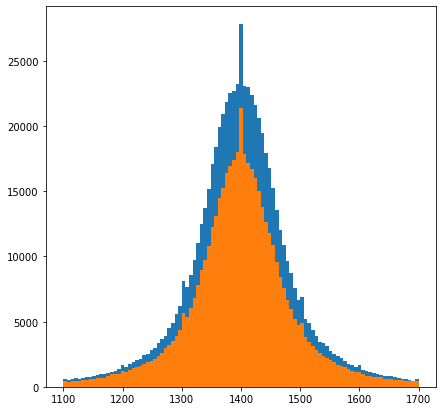

In [78]:
f, ax = plt.subplots(figsize=(7, 7))
bins = get_bins(300)
ax.hist(n_old, bins=bins)
ax.hist(n_new, bins=bins)
plt.show()

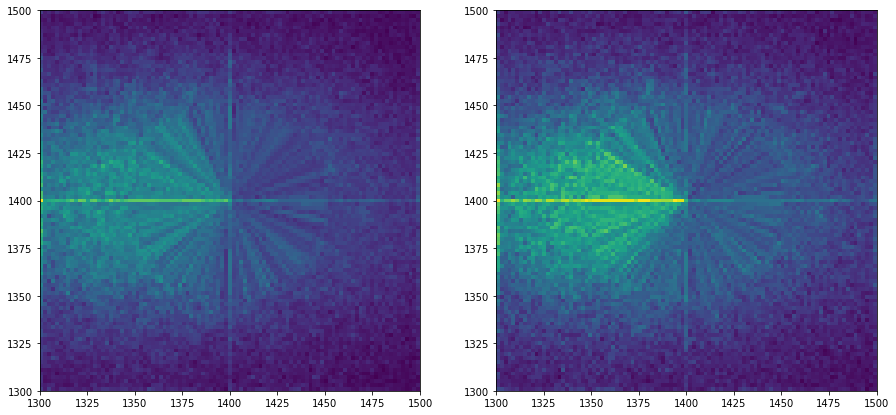

In [79]:
f, (ax_old, ax_new) = plt.subplots(ncols=2, figsize=(15, 7))
ax_old.hist2d(m_old, n_old, bins=get_bins(100))
ax_new.hist2d(m_new, n_new, bins=get_bins(100))
plt.show()

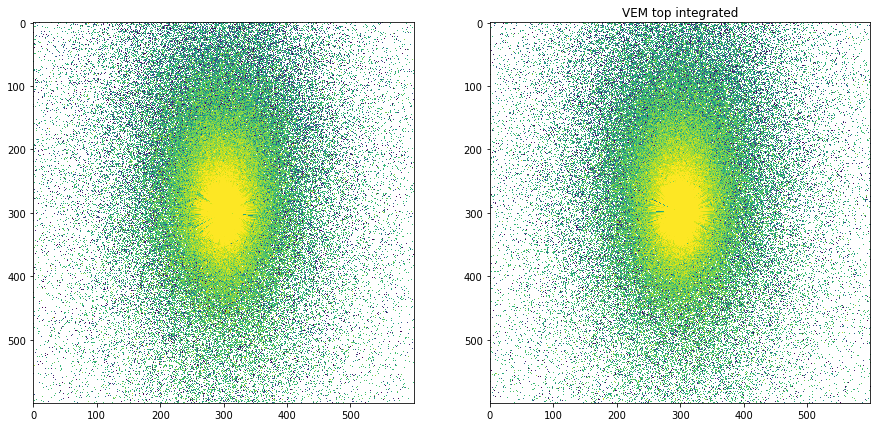

In [80]:
from matplotlib.colors import LogNorm

def plot_vem_integrated(ax: plt.Axes, vem):
    width = 300
    start = int(N_TILE / 2 - width)
    end = int(N_TILE / 2 + width)
    data = vem[start:end, start:end]

    pic = ax.imshow(data, interpolation='nearest', norm=LogNorm(vmin=1, vmax=3e3))
    # plt.colorbar(pic)


fig, (ax_old, ax_new) = plt.subplots(ncols=2, figsize=(15, 7))
plot_vem_integrated(ax_old, vem_old)
plot_vem_integrated(ax_new, vem_new)
plt.title("VEM top integrated")
plt.show()

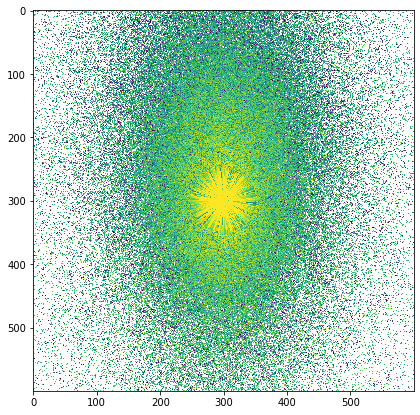

In [84]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_vem_integrated(ax, np.abs(vem_old - vem_new))
plt.show()


In [82]:
len(vem_new[vem_new > 0])

212668

In [83]:
len(vem_old[vem_old > 0])

212424